### TAF: En utilisant les données concernant la qualité, developper un algorithme de Machine Learning permettant de prédire la qualité du Vin.

## Contexte du projet
En tant que Data Developer, votre rôle est de créer un algorithme de machine learning pour prédire cela. 
    -lire les données 
    -faire une analysis exploratoire des données 
    -faire une visualisation des données 
    -faire la modélisation (machine learning) 
    -Entraîner et tester votre modèle.

In [2]:
# importation des bibliothéques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

# Lecture des données

In [4]:
# Importation des données
data = pd.read_csv("winequality-red.csv")

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### On rémarque dans notre tableau ci-haut qu'on à plusieurs variables indépendante (fixed acidity,	volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates,	alcohol) nommées X et une variable dépendante (quality) nommée Y qu'on doit predire sur une échelle de 0 à 10.

In [7]:
data.shape

(1599, 12)

In [8]:
# Observation des informations de structure des donnés
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Analyse Exploratoire et Visualisation des données

In [9]:
#exécution des statistiques descriptives sur toutes les variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
# Verification des données manquantes
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### On rémarque qu'il y a pas des données manquantes

In [11]:
# Observation de la variable dépendante
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
data['quality'].count()

1599

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

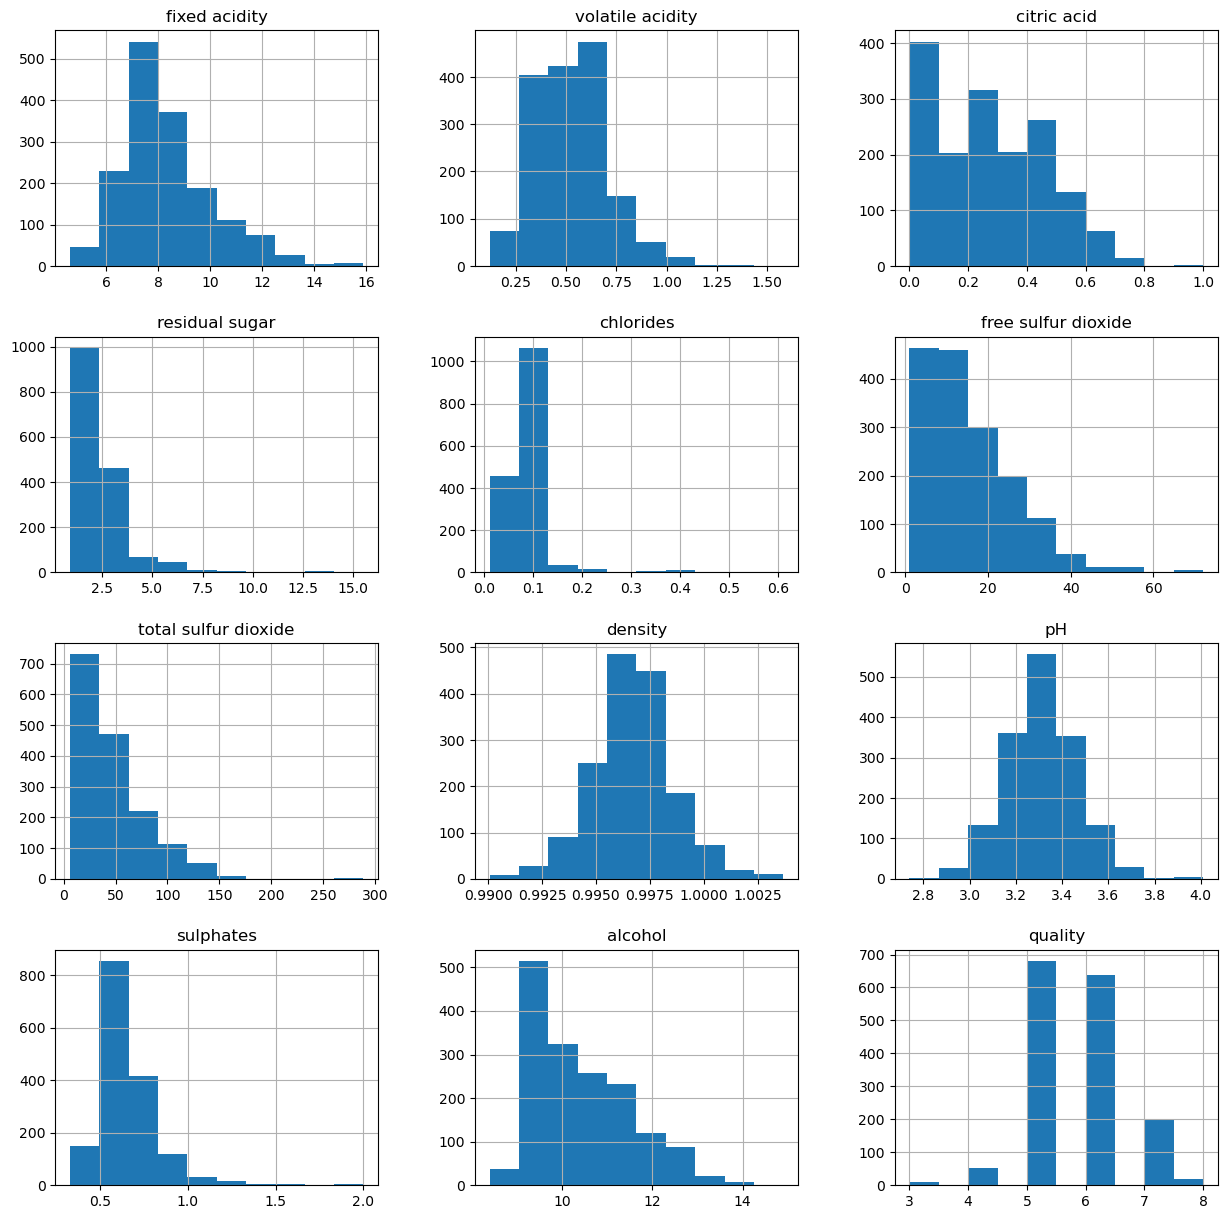

In [14]:
# Tracer tout les histogrammes
data.hist(figsize=(15,15))

<Axes: xlabel='quality', ylabel='count'>

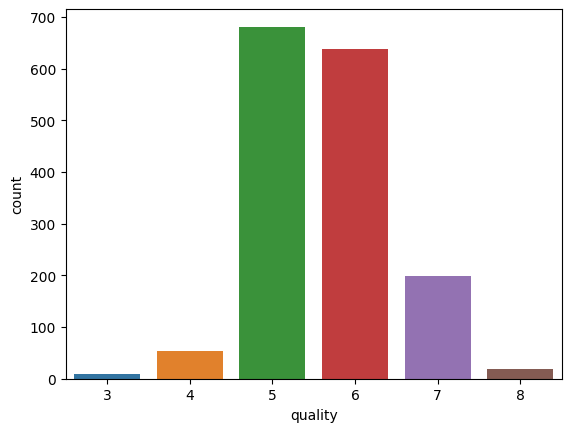

In [106]:
%matplotlib inline
sb.countplot(x='quality', data=data)

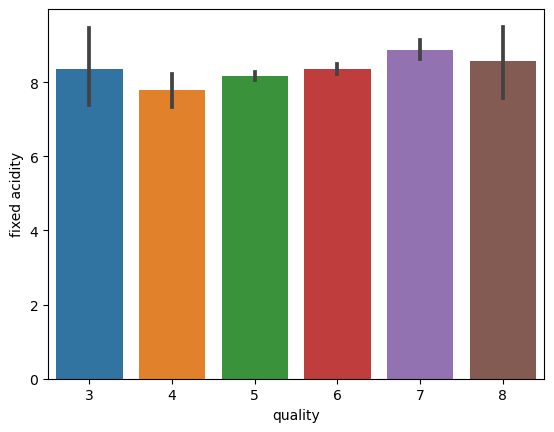

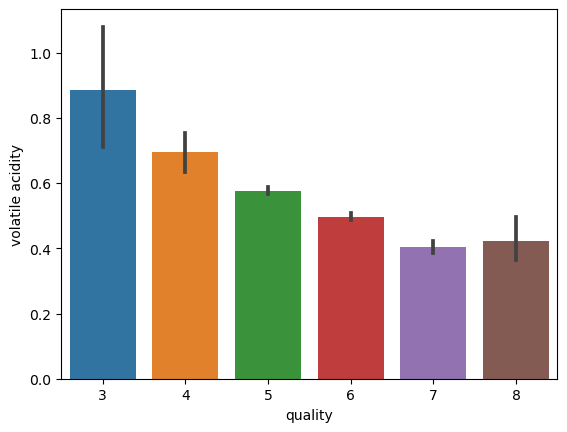

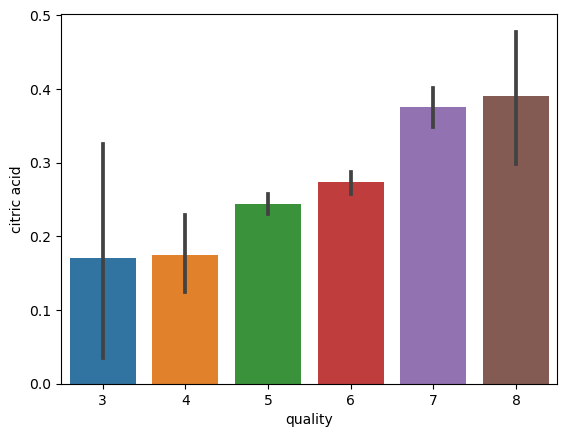

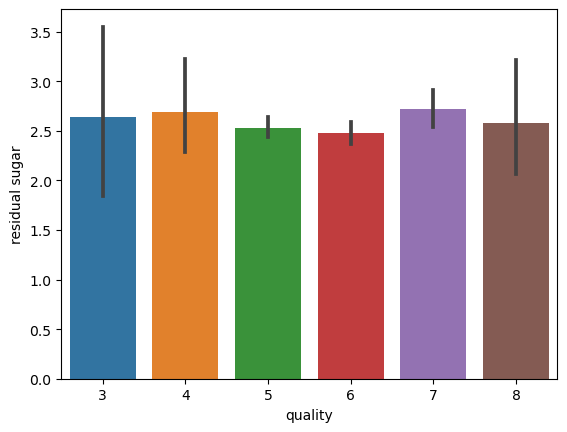

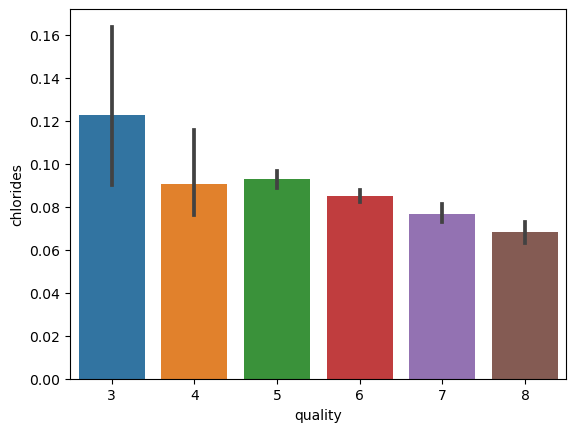

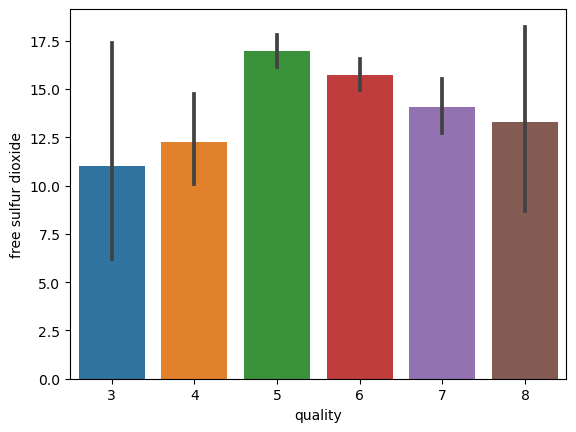

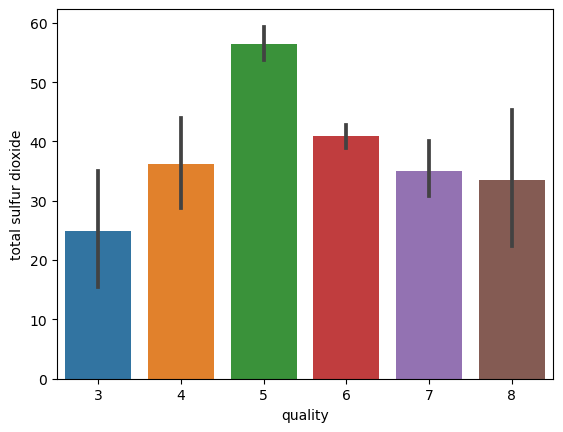

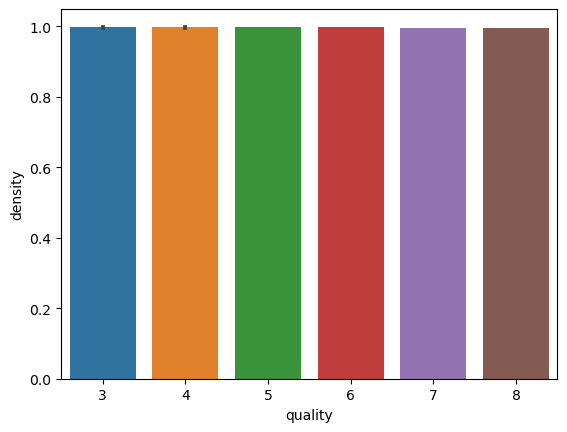

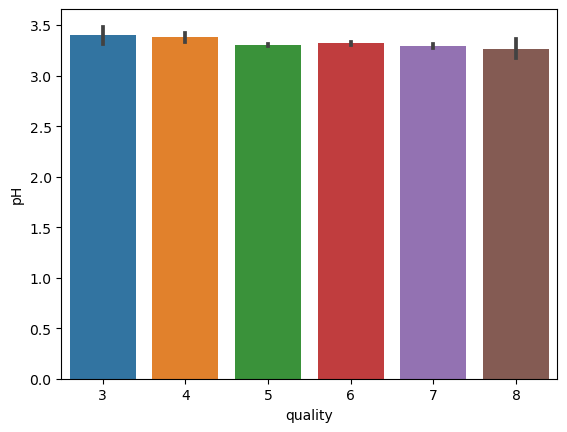

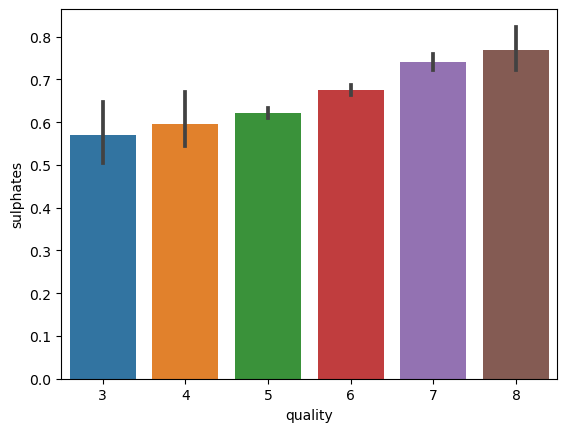

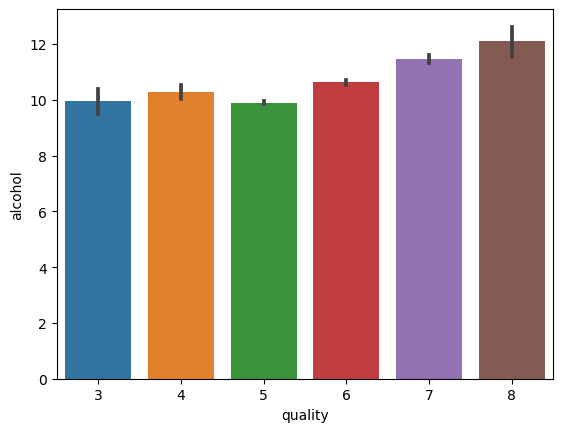

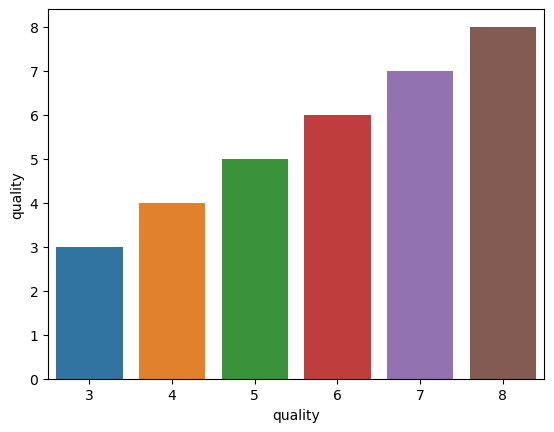

In [15]:
data1 = data.select_dtypes([int, float])

for i, col in enumerate(data1.columns):
    plt.figure(i)
    sb.barplot(x='quality', y=col, data=data1)

<Axes: xlabel='quality', ylabel='alcohol'>

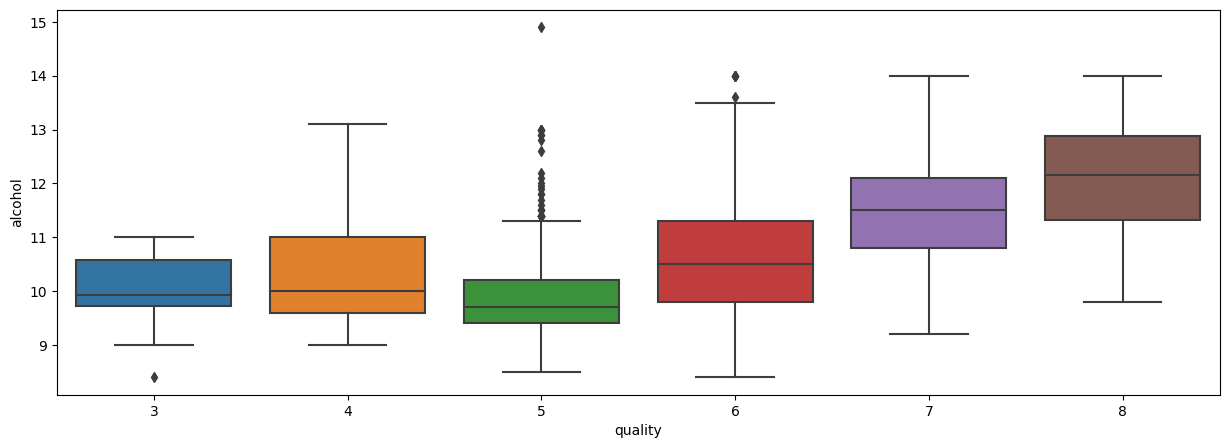

In [108]:
plt.figure(figsize=(15,5))
sns.boxplot(x='quality', y='alcohol', data=data)

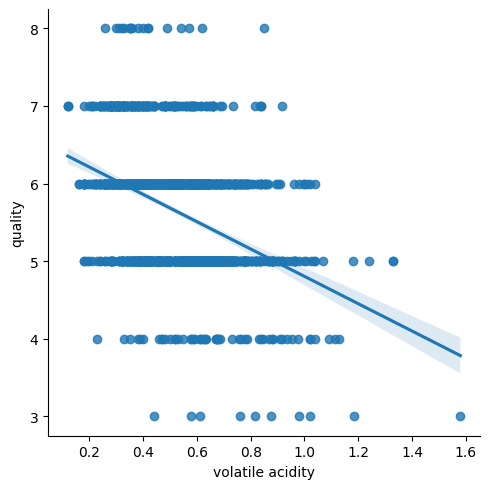

In [109]:
sns.lmplot(x='volatile acidity', y='quality', data=data)

In [16]:
data[data.quality >= 7].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,217.0,8.847005,1.999977,4.90000,7.4000,8.70000,10.10000,15.6000
volatile acidity,217.0,0.405530,0.144963,0.12000,0.3000,0.37000,0.49000,0.9150
citric acid,217.0,0.376498,0.194438,0.00000,0.3000,0.40000,0.49000,0.7600
residual sugar,217.0,2.708756,1.363026,1.20000,2.0000,2.30000,2.70000,8.9000
chlorides,217.0,0.075912,0.028480,0.01200,0.0620,0.07300,0.08500,0.3580
free sulfur dioxide,217.0,13.981567,10.234615,3.00000,6.0000,11.00000,18.00000,54.0000
total sulfur dioxide,217.0,34.889401,32.572238,7.00000,17.0000,27.00000,43.00000,289.0000
density,217.0,0.996030,0.002201,0.99064,0.9947,0.99572,0.99735,1.0032
pH,217.0,3.288802,0.154478,2.88000,3.2000,3.27000,3.38000,3.7800
sulphates,217.0,0.743456,0.134038,0.39000,0.6500,0.74000,0.82000,1.3600


#### On peut supposer qu'un vin de bonne qualité est >= 7

In [17]:
data[data.quality < 7].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1382.0,8.236831,1.682726,4.60000,7.100000,7.8000,9.1000,15.90000
volatile acidity,1382.0,0.547022,0.176337,0.16000,0.420000,0.5400,0.6500,1.58000
citric acid,1382.0,0.254407,0.189665,0.00000,0.082500,0.2400,0.4000,1.00000
residual sugar,1382.0,2.512120,1.415778,0.90000,1.900000,2.2000,2.6000,15.50000
chlorides,1382.0,0.089281,0.049113,0.03400,0.071000,0.0800,0.0910,0.61100
free sulfur dioxide,1382.0,16.172214,10.467685,1.00000,8.000000,14.0000,22.0000,72.00000
total sulfur dioxide,1382.0,48.285818,32.585604,6.00000,23.000000,39.5000,65.0000,165.00000
density,1382.0,0.996859,0.001808,0.99007,0.995785,0.9968,0.9979,1.00369
pH,1382.0,3.314616,0.154135,2.74000,3.210000,3.3100,3.4100,4.01000
sulphates,1382.0,0.644754,0.170629,0.33000,0.540000,0.6000,0.7000,2.00000


#### On peut supposer également qu'un vin de mauvaise qualité est < 7

In [18]:
# Matrice de correlation pour calculer les variables
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

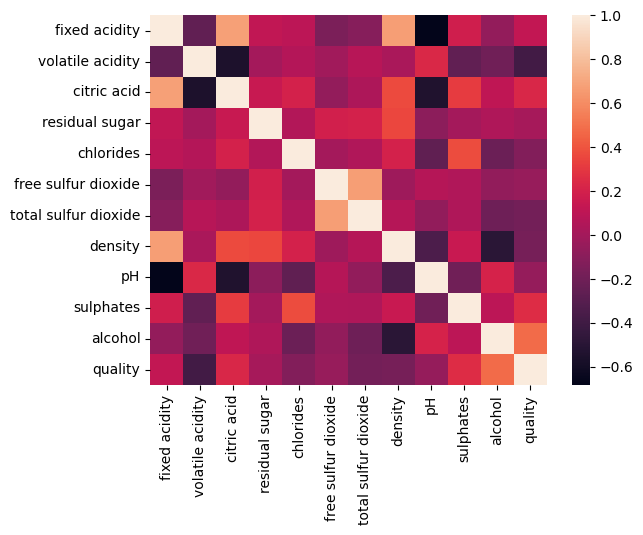

In [19]:
sns.heatmap(data.corr())

## Identification et Traitement des Valeurs abbérantes

*Une valeur aberrante est une valeur qui s'écarte fortement des valeurs des autres observations, anormalement faible ou élevée.*

*identifion les valeurs aberrante pour chaque variable de note datasete*

In [20]:
#definition d'une fonction pour trouver les nombres des valeurs aberrantes 
def Val_abberantes(data):
# Calcul des valeurs aberrantes en utilisant la méthode des quartiles
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    high_limit= Q3 + 1.5 * IQR
# Trouver les valeurs aberrantes
    outliers = ((data < low_limit) | (data > high_limit)).sum()
    print("Le nombre de valeurs aberrantes dans chaque colonne:")
    print(outliers)

In [21]:
import statsmodels.api as sm
X = data[['fixed acidity','volatile acidity','citric acid','chlorides','density','pH','sulphates','alcohol']]
Y=data[['quality']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
#Identification des valeurs aberrantes
u = model.resid / np.std(model.resid)
outliers = np.abs(u) > 2.5

#Suppression des valeurs aberrantes
df_clean = data.loc[~outliers, :]

df_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## -Modelisation et entrainement du modèle

#### Pour cette partie on utiliser des données de vin, les divisera en ensembles de formation et de test, puis on normalisera ces données, ensuite on créera un modèle de régression d'arbres de décision et enfin on predira des valeurs sur ces données de test. Il évalue ensuite la performance du modèle en calculant le MSE, le RMSE et le R².
#### Il est important de choisir le modèle le plus approprié pour le problème à résoudre. Pour un problème de classification de qualité de vin, les modèles populaires incluent la régression logistique, les arbres de décision et les réseaux de neurones.

In [22]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_clean[['fixed acidity','volatile acidity','citric acid','chlorides','density','pH','sulphates','alcohol']]
Y=df_clean[['quality']]

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Normaliser les données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Créer un modèle de régression d'arbres de décision
regressor = DecisionTreeRegressor(random_state=0)

In [117]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,0.99547,3.57,0.71,10.2


#### Entraîner le modèle : Une fois que le modèle approprié a été choisi, il est temps de l'entraîner sur l'ensemble d'entraînement.

In [23]:
# Entrainer le modèle
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
# Prédire les valeurs sur les données de test
y_pred = regressor.predict(X_test)

#### Évaluer le modèle : On a utilisé l'ensemble de test pour évaluer les performances du modèle. on peut utiliser différentes métriques(ou distance qui permet de mesurer le degré de parenté de deux éléments d'un même ensemble) telles que l'exactitude, la précision et le rappel pour évaluer les performances du modèle.

In [25]:
# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#### Le carré moyen des erreurs (mce) ou mse pour Mean Square Error : c’est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.

#### L’erreur quadratique moyenne (RMSE) : racine carrée du précédent.

In [26]:
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

MSE: 0.5063694267515924
RMSE: 0.7115963931552719
R^2: 0.19610337331937844


Teste du Modèle

In [38]:
from sklearn.linear_model import LinearRegression
X = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y=data[['quality']]

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluer les performances du modèle sur l'ensemble de test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Prédire la qualité du vin en utilisant le modèle
X_new = [[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]]
X_nex=[[7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8]]
quality = model.predict(X_nex)
print("Qualité du vin prédite:", quality)

RMSE: 0.6200574149384278
Qualité du vin prédite: [[5.10159886]]


C:\Users\T4TDEVDATA9\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
